# census mapping

## setup

In [131]:
import pandas as pd
import geopandas as gpd
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt 


In [132]:
# !pip install adjustText
# THIS PACKAGE HELPS TO AUTOMATICALLY REPOSITION MAP LABELLING
import adjustText as aT


In [133]:
!mkdir "{data_dir}/external/ons/datasets"

A subdirectory or file ../data/external/ons/datasets already exists.


In [134]:
# Used as root folder.
project_dir = '..'

data_dir = f"{project_dir}/data"

# Used as output folder for all boundary files and centroid files.
boundaries_dir = f"{data_dir}/external/ons/boundaries"

# Used as output folder for all lookup tables.
lookup_dir = f"{data_dir}/external/ons/lookups"

# Used as output folder for all lookup tables.
ons_datasets_dir = f"{data_dir}/external/ons/datasets"

_this notebook assumes that some datafiles (namely spatial boundaries and lookups) are available in the current project structure)_

the boundary datafiles are available in this project via version control, but it is arguably good practice to not version public data that is available online already 

## lsoa boundaries

In [135]:
gdf = gpd.read_file("https://gist.github.com/joel-lbth/f2d748b99ee7bfe43384d1a80694038a/raw/5ea02c312cc712ca7e74c818148e7ed47e3e4c90/lbth_lsoa11_full.geojson")

## lsoa lookups

In [136]:
lsoa_2011_2022_lookup = pd. read_csv("https://opendata.arcgis.com/api/v3/datasets/15299a7b8e6c498d94a08b687c75b73f_0/downloads/data?format=csv&spatialRefId=4326&where=1%3D1")

In [137]:
lsoa_to_ward = pd.read_excel("https://www.arcgis.com/sharing/rest/content/items/ceeba47c2ff74786b650eb59c507e58c/data")

## ward boundaries

In [138]:
wd22 = gpd.read_file("https://tow-azs-p-gis01.towerhamlets.gov.uk/server/rest/services/Corporate_Data/Ward_Boundary/FeatureServer/0/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&maxAllowableOffset=&geometryPrecision=&outSR=&having=&gdbVersion=&historicMoment=&returnDistinctValues=false&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&multipatchOption=xyFootprint&resultOffset=&resultRecordCount=&returnTrueCurves=false&returnExceededLimitFeatures=false&quantizationParameters=&returnCentroid=false&sqlFormat=none&resultType=&featureEncoding=esriDefault&f=geojson")

In [139]:
# EXAMINE THE WARD NAMES
wd22.apply(lambda x: print(x['NAME'], x.geometry.centroid.coords[0]), axis=1)

Canary Wharf (-0.022469390879946507, 51.50161156453551)
Weavers (-0.07043399086724493, 51.52672554950845)
Bethnal Green West (-0.05876530996648077, 51.528977076102414)
Poplar (-0.011396877266274414, 51.51003539520034)
Lansbury (-0.010928914148078315, 51.515305298343286)
Bromley North (-0.017756200268725056, 51.52640327534285)
Bethnal Green East (-0.0478129855223993, 51.526382928418954)
Shadwell (-0.05201276973360461, 51.51194349460291)
St Dunstan's (-0.04000234821326459, 51.518428785399244)
Spitalfields and Banglatown (-0.069262066255633, 51.51975155411953)
Whitechapel (-0.06494062636825827, 51.51390093179192)
Stepney Green (-0.04896231501894453, 51.51675690006147)
Bromley South (-0.017725981173495987, 51.521559552041744)
Mile End (-0.029479842814968047, 51.51822919992139)
Bow East (-0.026566312928777175, 51.53682306510947)
Bow West (-0.0370173297778701, 51.531380765337275)
St Katharine's and Wapping (-0.061489212228439366, 51.50657030433589)
Limehouse (-0.033744789064041686, 51.509985

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

## functions

In [140]:
def spatialise_data(gdf, df, left_on="LSOA11CD", right_on=''):
    """add spatial coordinates to a dataset containing LSOA codes

    Args: gdf, df, left_on="LSOA11CD", right_on=''
    Returns: geographies plus data (geodataframe)
    """
    gdf = gdf.merge(right=df, left_on=left_on, right_on=right_on)
    return gdf

In [141]:
def spatial_plot(gdf, suptitle="", title="", column="", cmap="viridis_r"):
    """create an geopandas spatial plot with some default settings

    Args:
        gdf (geodataframe): map of lbth
        suptitle (str, optional): super title. Defaults to ''.
        title (str, optional): title. Defaults to ''.
        column (str, optional): column to plot. Defaults to ''.
        cmap (str, optional): colormap choice. Defaults to "viridis_r".

    Returns:
        ax: geopandas plot axes

    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150, facecolor="w")
    plt.suptitle(suptitle, fontsize=16, y=0.95)
    plt.title(title, fontsize=8)
    gdf.plot(column=column, cmap=cmap, ax=ax, legend=True).axis("off")
    wd22.plot(ax=ax, facecolor="none", linewidth=2, edgecolor="black")
    texts=[]
    wd22.apply(
        lambda x: texts.append(ax.text(
            s=x["NAME"],
            x=x.geometry.centroid.coords[0][0],
            y=x.geometry.centroid.coords[0][1],
            ha="center",
            bbox={'facecolor': 'w', 'alpha': 0.6, 'boxstyle': 'round'}
        )),
        axis=1,
    )
    aT.adjust_text(
        texts,
        force_points=0.3,
        force_text=0.8,
        expand_points=(1, 1),
        expand_text=(1, 1),
    )

    return fig, ax


# datasets

## IMD 2019

In [142]:
imd = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/833970/File_1_-_IMD2019_Index_of_Multiple_Deprivation.xlsx", sheet_name='IMD2019')

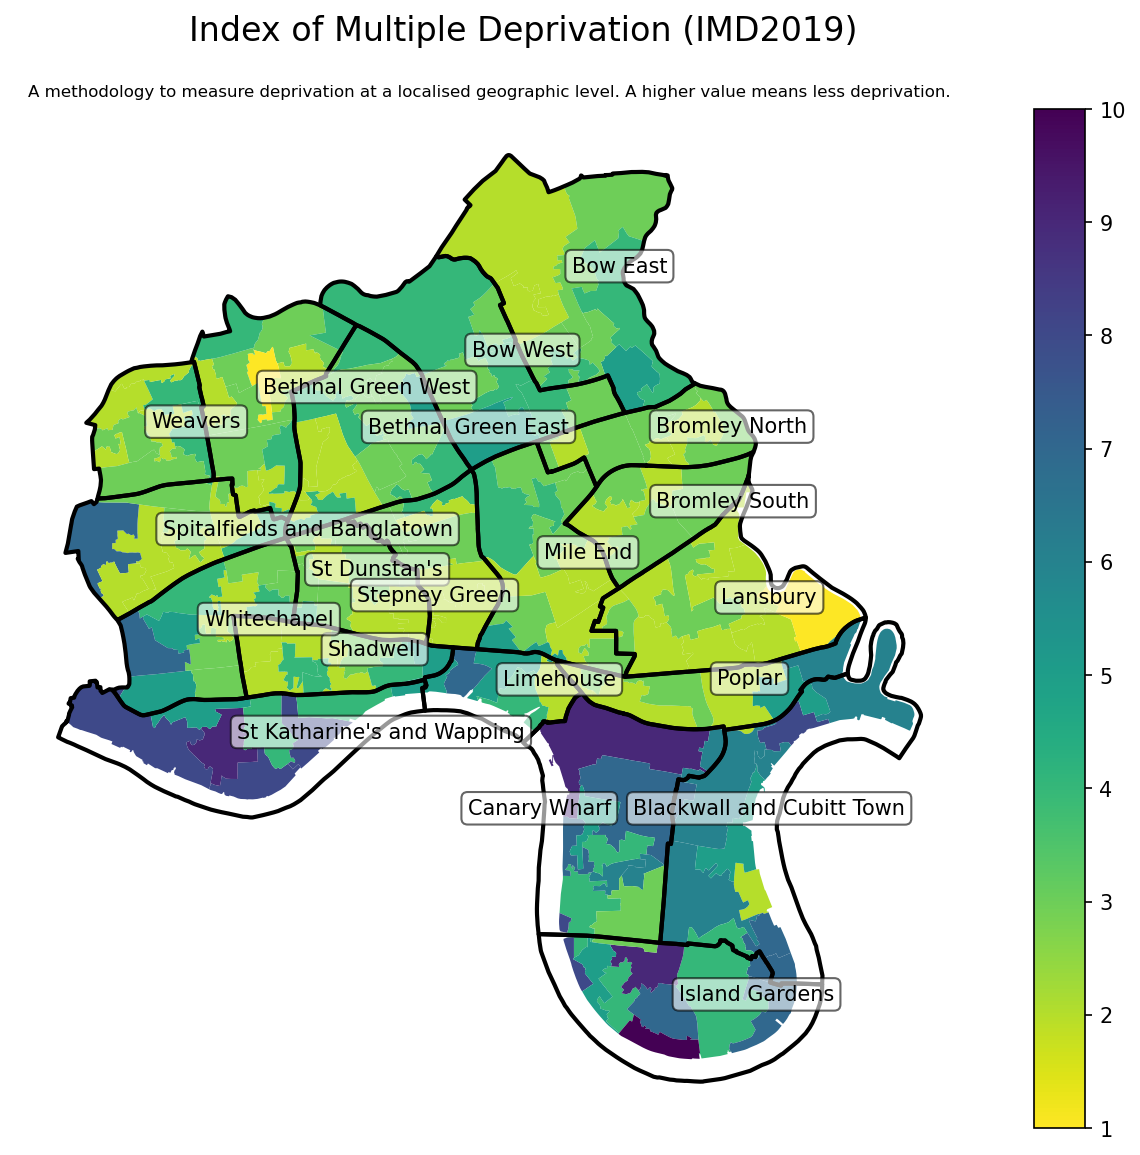

In [143]:
# spatialise_data(gdf=gdf, df=imd, left_on='LSOA11CD', right_on='LSOA code (2011)').plot(column='Index of Multiple Deprivation (IMD) Decile', legend=True).axis('off')
ax = spatial_plot(
    spatialise_data(gdf=gdf, df=imd, left_on='LSOA11CD', right_on='LSOA code (2011)'),
    column="Index of Multiple Deprivation (IMD) Decile",
    suptitle="Index of Multiple Deprivation (IMD2019)",
    title="A methodology to measure deprivation at a localised geographic level. A higher value means less deprivation.",
    cmap='viridis_r'
)

## DERI 1.5
https://github.com/GreaterManchesterODA/Digital-Exclusion-Risk-Index/

In [144]:
df = pd.read_csv("https://raw.githubusercontent.com/GreaterManchesterODA/Digital-Exclusion-Risk-Index/main/Version%201.5/LSOA%20calculations%20and%20scores%20(district%20level)_v1.5.csv")

(<Figure size 1800x1350 with 2 Axes>,
 <AxesSubplot:title={'center':'A methodology to understand the risk of digital exclusion at a localised geographic level. A higher value (lighter colour) represents a higher risk'}>)

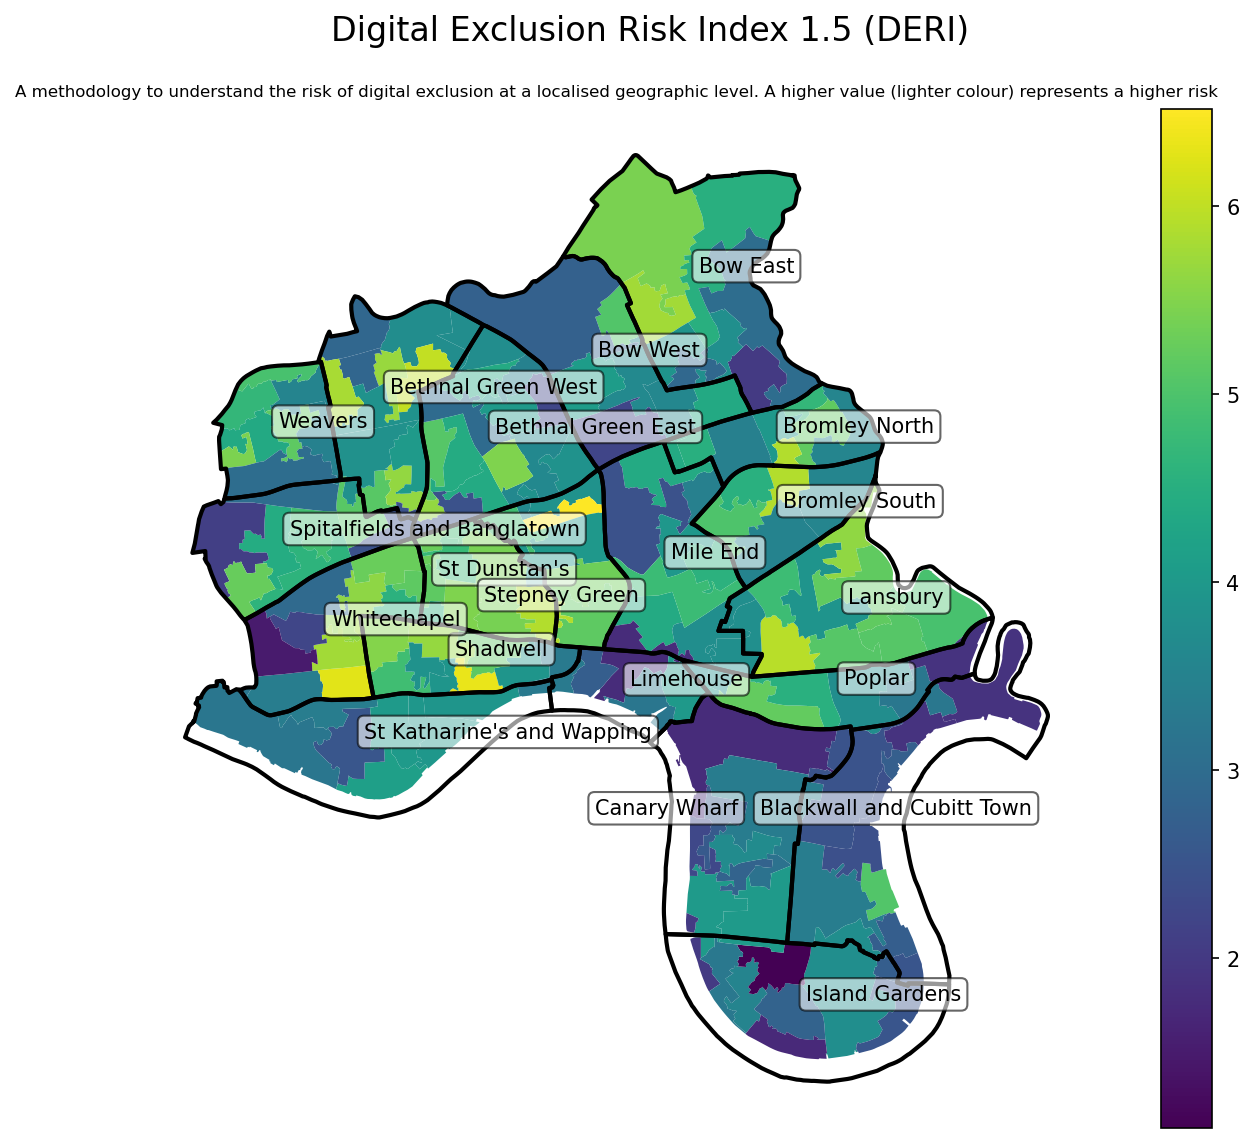

In [145]:
spatial_plot(
    spatialise_data(gdf, df, left_on="LSOA11CD", right_on="LSOA code"),
    column="DERI score (England IMD)",
    suptitle="Digital Exclusion Risk Index 1.5 (DERI)",
    title="A methodology to understand the risk of digital exclusion at a localised geographic level. A higher value (lighter colour) represents a higher risk",
    cmap="viridis"
)
